### Logistic Regression Using numpy

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import pprint

In [2]:
x=[10, 20, 30, 40, 50, 60, 70]
y=[0, 0, 0, 1, 1, 1, 1]
print(x)
print(y)

[10, 20, 30, 40, 50, 60, 70]
[0, 0, 0, 1, 1, 1, 1]


In [3]:
xx=[ [1.0, float(ix) ] for ix in x]
print(xx)

[[1.0, 10.0], [1.0, 20.0], [1.0, 30.0], [1.0, 40.0], [1.0, 50.0], [1.0, 60.0], [1.0, 70.0]]


In [4]:
X=np.array(xx)
y=np.array(y)
print(X.shape)
print ( type(X))
print(X)

(7, 2)
<class 'numpy.ndarray'>
[[ 1. 10.]
 [ 1. 20.]
 [ 1. 30.]
 [ 1. 40.]
 [ 1. 50.]
 [ 1. 60.]
 [ 1. 70.]]


In [5]:
print(X.shape)

(7, 2)


In [6]:
print(X.shape[0])

7


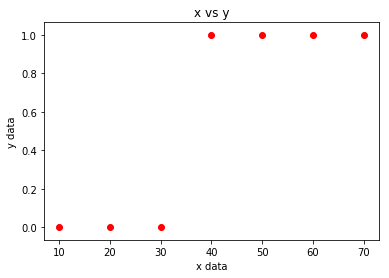

In [7]:
plt.scatter(x, y, color = 'red') 
plt.title('x vs y')
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

In [8]:
class MyLogisticRegression():
    def __init__(self):
        print('mylogisitic regression')
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def linRG(self, x, theta):
        return np.dot(theta, x.T)

    def predict(self, X, theta):
      z = self.linRG(X, theta)
      return self.sigmoid(z)
    def loss(self, h, y):
        return (- y * np.log(h) - (1 - y ) * np.log(1 - h) ).mean()
    def gradient(self, x, h, y):
        n = x.shape[0]
        return (1 / n) * np.dot( (h - y), X)
    def train(self, X,y, epoch, lr, theta):
        for i in range(epoch):
            h=self.predict(X, theta)  
            gd=self.gradient(X, h, y)
            theta = theta-lr * gd 
        return theta


In [9]:
mg=MyLogisticRegression()
epoch=90000 
lr=0.1
theta = np.zeros(2)
theta=mg.train(X, y, epoch, lr, theta)
print(theta)

mylogisitic regression
[-29.28835743   0.84097994]


In [10]:
pd=mg.predict(X, theta)
print(pd)
prd=[ 1 if ipd>0.5 else 0 for ipd in pd]
print(prd)

[8.56165004e-10 3.84490213e-06 1.69738945e-02 9.87268217e-01
 9.99997128e-01 9.99999999e-01 1.00000000e+00]
[0, 0, 0, 1, 1, 1, 1]


### Iris Dataset [Binary, First two Species]

In [42]:
from sklearn import datasets

In [98]:
iris =  datasets.load_iris() 
X = iris.data[:100]  #all columns
y = iris.target[:100]

In [99]:
# print( iris.data[0])
print (X[:3])
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [100]:
print(X.shape)

(100, 4)


In [101]:
ix=X[:]

ix2=np.ones((ix.shape[0],  1))
ix2=np.append(ix2, ix , axis=1)
# print(ix2[:3])
X=ix2
print(X[:3])

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]]


In [49]:
print(X[0].shape[0])

5


In [61]:
theta = np.zeros(X[0].shape[0])
print(theta)

[0. 0. 0. 0. 0.]


In [47]:
mg=MyLogisticRegression()
epoch=90000 
lr=0.1
theta = np.zeros(X[0].shape[0])
theta=mg.train(X, y, epoch, lr, theta)
print(theta)

mylogisitic regression
[-0.71147732 -1.14034983 -4.04159746  6.31206632  2.96447301]


In [50]:
pd=mg.predict(X, theta)
# print(pd)
prd=[ 1 if ipd>0.5 else 0 for ipd in pd]
print(prd)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [18]:
from sklearn.metrics import accuracy_score  

In [52]:
 accuracy_score(y, prd)*100

100.0

### Iris Dataset All 3 Classes

In [2]:
from sklearn import datasets
iris =  datasets.load_iris() 
X = iris.data
y = iris.target

In [3]:
print(X[:3])
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
ix=X[:]
ix2=np.ones((ix.shape[0],  1))
ix2=np.append(ix2, ix , axis=1)
print(ix2[:3])
X=ix2
print(X[:3])

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]]
[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]]


In [58]:
k=3  #classes

In [7]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
t= np.array(y==2, dtype = int)
print(t)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [59]:
for ik in range(k):
    tmp_y = np.array(y==ik, dtype = int)
    print(tmp_y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [62]:
print(X[0].shape)
thetas=np.zeros( (k, X[0].shape[0]) )
print(thetas)

(5,)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [63]:
mg=MyLogisticRegression()
epoch=90000 
lr=0.1

thetas=np.zeros( (k, X[0].shape[0]) )
for ik in range(k):
    tmp_y = np.array(y==ik, dtype = int)
    theta = np.zeros(X[0].shape[0])
    theta=mg.train(X, tmp_y, epoch, lr, theta)
    thetas[ik]=theta


mylogisitic regression


In [64]:
print(thetas)

[[  0.68633772   1.09979165   3.81317717  -5.98736789  -2.83767492]
 [  7.37790348  -0.24528697  -2.79648084   1.31362024  -2.77833873]
 [-14.37536249  -3.78415702  -5.20867241   6.96487626  11.13180607]]


In [69]:
pd=mg.predict(X, thetas)
# print(pd)

In [70]:
print(pd.shape)

(3, 150)


In [67]:
prd=[]
for i in range(pd.shape[1]):
    
    vals= [ pd[0][i], pd[1][i], pd[2][i] ]
    m=np.argmax(vals)
    prd.append(m)
    
print(prd)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [40]:
mm=np.argmax(pd, axis=0)
print(mm)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [71]:
 accuracy_score(y, prd) * 100

98.0

In [90]:
nv=[1, 1.9 , 3.0 ,   2.4 , 3.2]
nv=np.array(nv)
print(nv)

[1.  1.9 3.  2.4 3.2]


In [92]:
npd=mg.predict(nv, thetas[0])
npd1=mg.predict(nv, thetas[1])
npd2=mg.predict(nv, thetas[2])
print(npd, npd1, npd2)

npdr=[npd, npd1, npd2]
npv=np.argmax(npdr)
print(npv)

9.757718227333956e-05 0.0007345045195560041 0.9999997357062428
2


In [72]:
vals=[ [3,2,7],
       [4,5,6]
     ]
print( np.argmax(vals, axis=1)  )

[2 2]


In [143]:
a=np.array(vals)
print(a)
print(a[:,1])

[[3 2 7]
 [4 5 6]]
[2 5]
